## 04. 자동미분

In [2]:
import torch
import torch.nn as nn
import matplotlib as plt
import torch.optim as optim

### 4-1. requires_grad

In [21]:
# 아직 x에 대해서 자동 미분을 할 준비가 안되어있음
x = torch.rand(3)
print(x)
print(x.grad)
print(x.grad_fn)
print(x.requires_grad)

tensor([0.2959, 0.4346, 0.2048])
None
None
False


In [27]:
x = torch.ones(3, requires_grad=True)
print(x)
print(x.requires_grad) # 일단 True로 바뀜

tensor([1., 1., 1.], requires_grad=True)
True


In [28]:
y = 2 * x
print(y)
print(y.grad)
print(y.grad_fn)
print(y.requires_grad)

tensor([2., 2., 2.], grad_fn=<MulBackward0>)
None
True


C:\Users\USER\AppData\Local\Temp\ipykernel_944\268873173.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [29]:
z = y ** 2
print(z)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)


## 4-2. Backward
x -> y -> z 계산을 역전파를 통해 기울기를 구함

In [30]:
result = z.sum() # 노드들 값 다 합쳐서 하나의 값 도출
result.backward() # 그 값에서 뒤로 돌아감

In [31]:
print(z)
print(x.grad)

tensor([4., 4., 4.], grad_fn=<PowBackward0>)
tensor([8., 8., 8.])


In [34]:
x = torch.tensor(1.0, requires_grad=True)
print(x.requires_grad)

with torch.no_grad():
    y = x ** 2
    print(x.requires_grad)
    print(y.requires_grad) # with 안에서는 다음단계로 넘어갈때 기울기 계산이 False가 됨

True
True
False


### 선형회귀 연습
1. 입출력 정의

2. 모델 정의

3. 손실함수 정의
- 손실함수 선택 : MSE, MAE

4. 가중치 업데이트
- 경사하강법 -> 어떤 것을 사용할지 선택

5. 학습 반복

6. 결과 시각화

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Epoch [0], Loss:  341.1992
Epoch [100 / 500], Loss:  4.0720
Epoch [200 / 500], Loss:  4.0298
Epoch [300 / 500], Loss:  4.0142
Epoch [400 / 500], Loss:  4.0085
Epoch [500 / 500], Loss:  4.0063


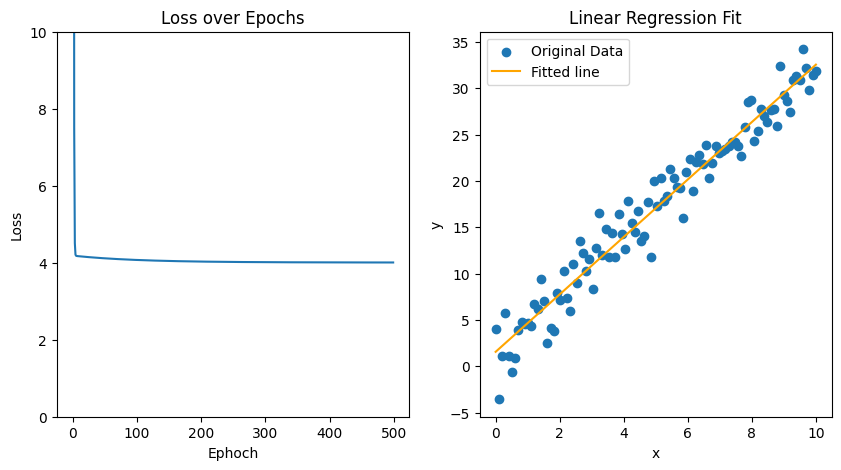

Model parameters
linear.weight: tensor([[3.0982]])
linear.bias: tensor([1.5687])


In [6]:
#1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1) # 입력데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2 # y 값 증가가 너무 일정하니 노이즈를 주어서 값에 변동을 줌

import torch.nn as nn # neural network
#2. 모델 정의
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel() # 모델 정의

#3. 손실함수 정의
# 손실함수 선택 : MSE, MAE
loss_function = nn.MSELoss() # 손실함수 정의

import torch.optim as optim
#4. 가중치 업데이트
# 경사하강법 -> 어떤 것을 사용할지 선택
#lr = learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01) # 사용할 모델, 모델의 설정값(가중치, 편향)과 학습률 지정 넣기
print(optimizer)
#5. 학습 반복
epochs = 500 # 반복횟수
losses = [] #각각의 루프마다 발생하는 손실을 저장

for epoch in range(epochs): # 반복횟수만큼 반복을 돌림
    optimizer.zero_grad() # 기울기 초기화
    outputs = model(x) # 모델을 기반으로 결과값 도출
    loss = loss_function(outputs, y) # 결과값과 정답을 비교해 손실을 계산
    loss.backward() # 역전파로 가중치 구하기
    optimizer.step() # 가중치 업데이트 하기

    losses.append(loss.item()) # 손실값 저장


    if epoch == 0:
        print(f"Epoch [{epoch}], Loss: {loss.item(): .4f}")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1} / {epochs}], Loss: {loss.item(): .4f}")

import matplotlib.pyplot as plt
#6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.ylim(0, 10)
plt.title("Loss over Epochs")
plt.xlabel("Ephoch")
plt.ylabel("Loss")

#데이터와 예측 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="orange", label="Fitted line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

### 실습1 - 다중 선형 회귀 구현

Epoch [0], Loss:  217.6376
Epoch [100 / 1000], Loss:  3.6793
Epoch [200 / 1000], Loss:  3.0145
Epoch [300 / 1000], Loss:  2.8546
Epoch [400 / 1000], Loss:  2.7307
Epoch [500 / 1000], Loss:  2.6322
Epoch [600 / 1000], Loss:  2.5538
Epoch [700 / 1000], Loss:  2.4914
Epoch [800 / 1000], Loss:  2.4416
Epoch [900 / 1000], Loss:  2.4017
Epoch [1000 / 1000], Loss:  2.3698


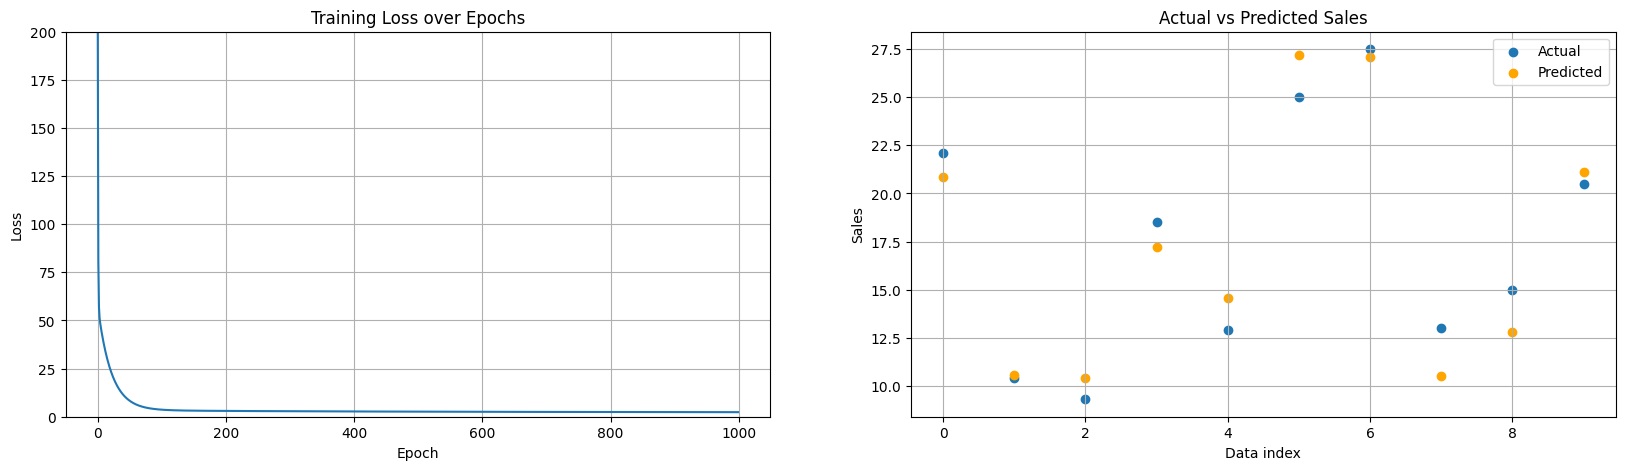

Model parameters
linear.weight: tensor([[ 2.0430e-01,  4.2619e-01, -3.1198e-04]])
linear.bias: tensor([0.0176])


In [ ]:
# 실습1. 다중 선형 회귀 구현
#1. 입력값
x = torch.tensor([[50.0, 25.0, 30.0],
                [10.0, 20.0, 25.0],
                [5.0, 22.0, 30.0],
                [30.0, 26.0, 28.0],
                [40.0, 15.0, 28.0],
                [60.0, 35.0, 40.0],
                [70.0, 30.0, 35.0],
                [20.0, 15.0, 20.0],
                [25.0, 18.0, 22.0],
                [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

#2. 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super(MultipleLinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1) # 입력 3개, 출력 1개

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

#3. 손실함수 정의
loss_function = nn.MSELoss()

#4. 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr=0.0001) # 이번 실습의 핵심. 학습률을 계속 건드려야 하고 이전 실습 학습률은 택도 없음

#5. 학습 반복
epochs = 1000 
losses = [] 

for epoch in range(epochs): 
    optimizer.zero_grad() 
    outputs = model(x) 
    loss = loss_function(outputs, y) 
    loss.backward() 
    optimizer.step()

    losses.append(loss.item())


    if epoch == 0:
        print(f"Epoch [{epoch}], Loss: {loss.item(): .4f}")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1} / {epochs}], Loss: {loss.item(): .4f}")

#6. 결과 시각화
plt.figure(figsize=(20,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.ylim(0, 200)
plt.grid()
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

actual = y.numpy()
predict =  model(x).detach().numpy()
index = list(range(len(actual)))

#실제값과 예측값 비교
plt.subplot(1, 2, 2)
plt.grid()
plt.scatter(index, actual, label="Actual")
plt.scatter(index, predict, color="orange", label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.legend()

plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


### 실습2 - 로지스틱 회귀 구현

[0], Loss:  0.4964
Epoch [100 / 1000], Loss:  0.3710
Epoch [200 / 1000], Loss:  0.3151
Epoch [300 / 1000], Loss:  0.2841
Epoch [400 / 1000], Loss:  0.2645
Epoch [500 / 1000], Loss:  0.2509
Epoch [600 / 1000], Loss:  0.2410
Epoch [700 / 1000], Loss:  0.2335
Epoch [800 / 1000], Loss:  0.2276
Epoch [900 / 1000], Loss:  0.2228
Epoch [1000 / 1000], Loss:  0.2189
w [[1.2256569 1.2647334]]
b [-0.12403446]


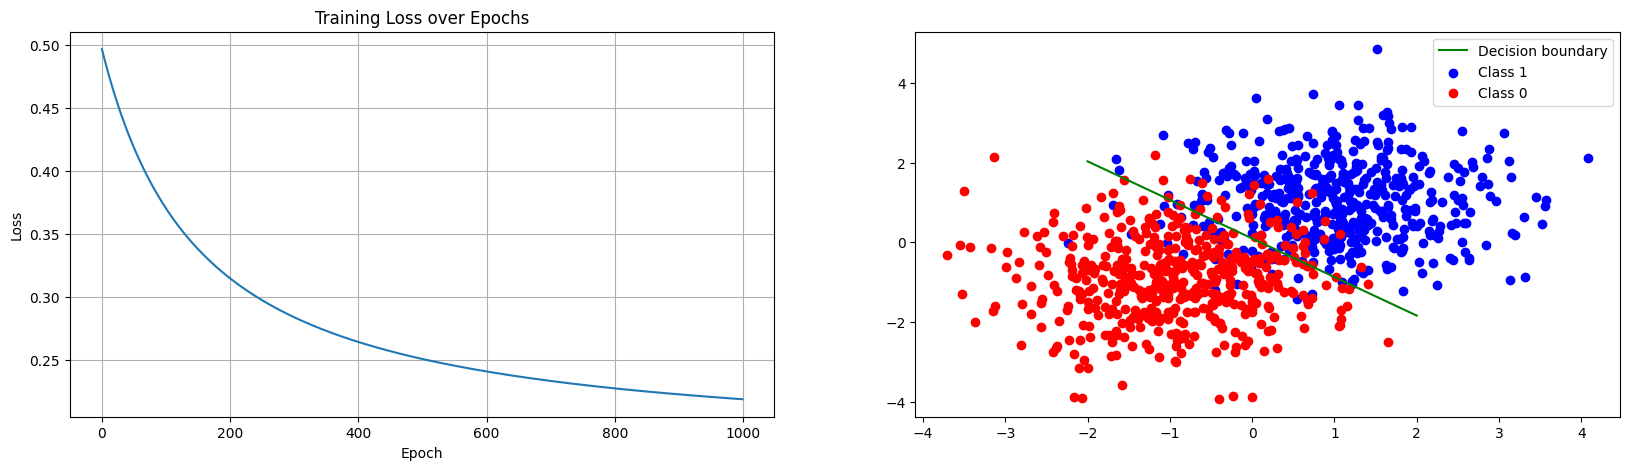

Model parameters
linear.weight: tensor([[1.2257, 1.2647]])
linear.bias: tensor([-0.1240])


In [63]:
#실습2 로지스틱 회귀 구현
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 입출력 정의
np.random.seed(42) # 시드값 기반으로 랜덤
num_samples = 500

# 1-1. class 1
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1,0],
                  [0,1]])
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples) # 적당하게 분산된 랜덤값. 평균, 분산도, 갯수
# 평균 - 점이 찍힐 중심점

# 1-2. class 0
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1,0],
                  [0,1]])
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples) # 적당하게 분산된 랜덤값. 평균, 분산도, 갯수

data = np.vstack((data_1, data_2)) # 데이터 합치기
data = torch.from_numpy(data).float() # pytorch로 사용할수 있는 tensor 형태로 변환
labels = np.ones(num_samples * 2) # 앞은 클래스1에 해당해서 1로, 뒤는 클래스0에 해당해서 0으로
labels[num_samples:] = 0 # 뒤부터 모두 0으로
labels = torch.from_numpy(labels).float().view(-1, 1) # data와 형태를 맞춤

# 2. 모델 정의
class logisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out) # 시그모이드 함수 적용
        return out

model = logisticRegression(2, 1) # 입출력 차원도 입력

# 3. 손실함수
loss_fn = nn.BCELoss()

#4. 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr=0.01)
# 파라미터스 - 가중치와 편향 들이었음

epochs = 1000
losses = []
# 5. 학습 반복
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(data) # 결과 예측하고
    loss = loss_fn(outputs, labels) # 손실 구하고
    loss.backward()  # 역전파하고
    optimizer.step() # 기울기 업데이트

    losses.append(loss.item())

    if epoch == 0:
        print(f"[{epoch}], Loss: {loss.item(): .4f}")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1} / {epochs}], Loss: {loss.item(): .4f}")

#6. 결과 시각화
plt.figure(figsize=(20,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plot decision boundary
plt.subplot(1, 2, 2)

w = model.linear.weight.data.numpy() # weight
print("w", w)
b = model.linear.bias.data.numpy() # bias
print("b", b)
x_1 = np.array([-2, 2])
x_2 = ((-w[0][0]* x_1) - b[0]) / w[0][1]    #  0 = w1 x1 + w2 x2 + b
# 0 = w1 * x1 + w2 * x2 + b
# -(w1 * x1) = w2 * x2 + b
# -(w1 * x1) -b = w2 * x2
# (-1(w1 * x1) - b) ws = x2
plt.plot(x_1, x_2, color='g', label='Decision boundary')
plt.scatter(data_1[:, 0], data_1[:, 1], color='b', label='Class 1')
plt.scatter(data_2[:, 0], data_2[:, 1], color='r', label='Class 0')
plt.legend()
plt.show()

# 최종 모델 파라미터 확인
print("Model parameters")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")


### 실습3 - FashionMNIST 신경망 구현

In [76]:
#실습3 FashionMNIST 신경망 구현
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# 1. 데이터 입출력 정의
#원본 데이터들
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

# batch size에 따라 데이터를 불러와줌
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # 평탄화
        self.linear_relu_stack = nn.Sequential( # 신경망의 여러개 층을 만들기
            nn.Linear(28 * 28, 512), # 입력층. 28*28 구한후 512로 줄임
            nn.BatchNorm1d(512), # Batch normalization
            nn.ReLU(),
            nn.Linear(512, 256), # Layer 1
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 64), # Layer 2. 256에서 4로 나눠짐
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10) # 출력층
        )
    
    def forward(self, x):
        out = self.flatten(x) # x값에 대해 평탄화
        out = self.linear_relu_stack(out) # 층을 거쳐 렐루 거쳐 결과 나옴
        return out
    
model = NeuralNetwork()
model.to(device)
print(model)

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss() # 다중 분류에는 cross entropy 사용
optimizer = optim.Adam(model.parameters(), lr=0.001) # 아담 사용
epochs = 10 # 데이터가 너무 많으므로 10번만 일단 돌리기



def train_loop(device, train_dataloader, model, loss_fn, optimizer, epochs):
    for epoch in range(epochs):
        print(f"Epoch: {epoch+1} ------------")
        size = len(train_dataloader.dataset)
        for batch, (X,y) in enumerate(train_dataloader):
            optimizer.zero_grad()
            X = X.to(device) # gpu로 연산하겠다
            y = y.to(device)
            outputs = model(X)
            loss = loss_fn(outputs, y)
            loss.backward()
            optimizer.step()

            if batch % 100 == 0:
            #loss = loss.item()
                current = batch * len(X)
                print(f"loss: {loss: .4f}, [{current} / {size}]")

train_loop(device, train_dataloader, model, loss_fn, optimizer, epochs)

# 테스트 진행
def train_loop(device, test_dataloader, model, loss_fn):
    test_size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss = 0
    correct = 0

    with torch.no_grad(): # 테스트 하는거니 기울기 업데이트 없다 표시
        for X, y in test_dataloader: # 테스트 데이터마다
            X = X.to(device) # gpu로 연산하겠다
            y = y.to(device)
            outputs = model(X)
            test_loss += loss_fn(outputs, y).item() # 손실을 계산해서 값을 손실 합에 더하기 
            correct += (outputs.argmax(1) == y).type(torch.float).sum().item() # 10개의 점수. 그중 가장 높은걸 정답으로 추측. 
        #그 추측이 실제와 맞으면 정답이라고 처리하고 정답 갯수 증가
        #.type(torch.float).sum().item() - True 결과를 숫자로 바꿔서 값을 뽑아내기
    test_loss /= num_batches
    correct /= test_size
    print(f"Accuracy: {100 * correct: .1f}, Avg loss: {test_loss}")

train_loop(device, test_dataloader, model, loss_fn)

cuda
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)
loss:  2.4217, [0 / 60000]
loss:  0.5581, [6400 / 60000]
loss:  0.4023, [12800 / 60000]
loss:  0.4959, [19200 / 60000]
loss:  0.4101, [25600 / 60000]
loss:  0.4064, [32000 / 60000]
loss:  0.3414, [38400 / 60000]
loss:  0.4955, [44800 / 60000]
loss:  0.3927, [51200 / 60000]
loss:  0.4247, [57600 / 60000]
Epoch: 1------------------

TypeError: train_loop() missing 1 required positional argument: 'optimizer'

In [75]:
#실습3 정답 버전 코드
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
# print(device)

# 1. 데이터 입출력 정의
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# 2. 모델 정의
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
      nn.Linear(28*28, 512), # 입력층
      nn.BatchNorm1d(512), 
      nn.ReLU(),
      nn.Linear(512, 256), # Layer 1
      nn.BatchNorm1d(256), 
      nn.ReLU(),
      nn.Linear(256, 64), # Layer 2
      nn.BatchNorm1d(64), 
      nn.ReLU(),
      nn.Linear(64, 10), # 출력층
    ) # [0.2, 2.1, 1.5, 0.4, ......]

  def forward(self, x):
    out = self.flatten(x)
    out = self.linear_relu_stack(out)
    return out

model = NeuralNetwork()
model.to(device) # GPU적용

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss = loss.item()
      current = batch * len(X)
      print(f"loss: {loss: .4f}, [{current} / {size}]")

def test_loop(dataloader, model, loss_fn):
  test_size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for X, y in dataloader:
      X = X.to(device)
      y = y.to(device)
      outputs = model(X)
      test_loss += loss_fn(outputs, y).item()
      correct += (outputs.argmax(1) == y).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= test_size
  print(f"Accuracy: {100*correct: .1f}, Avg loss: {test_loss}")


for epoch in range(epochs):
  print(f"Epoch: {epoch+1}----------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader, model, loss_fn)
print("Complete!")

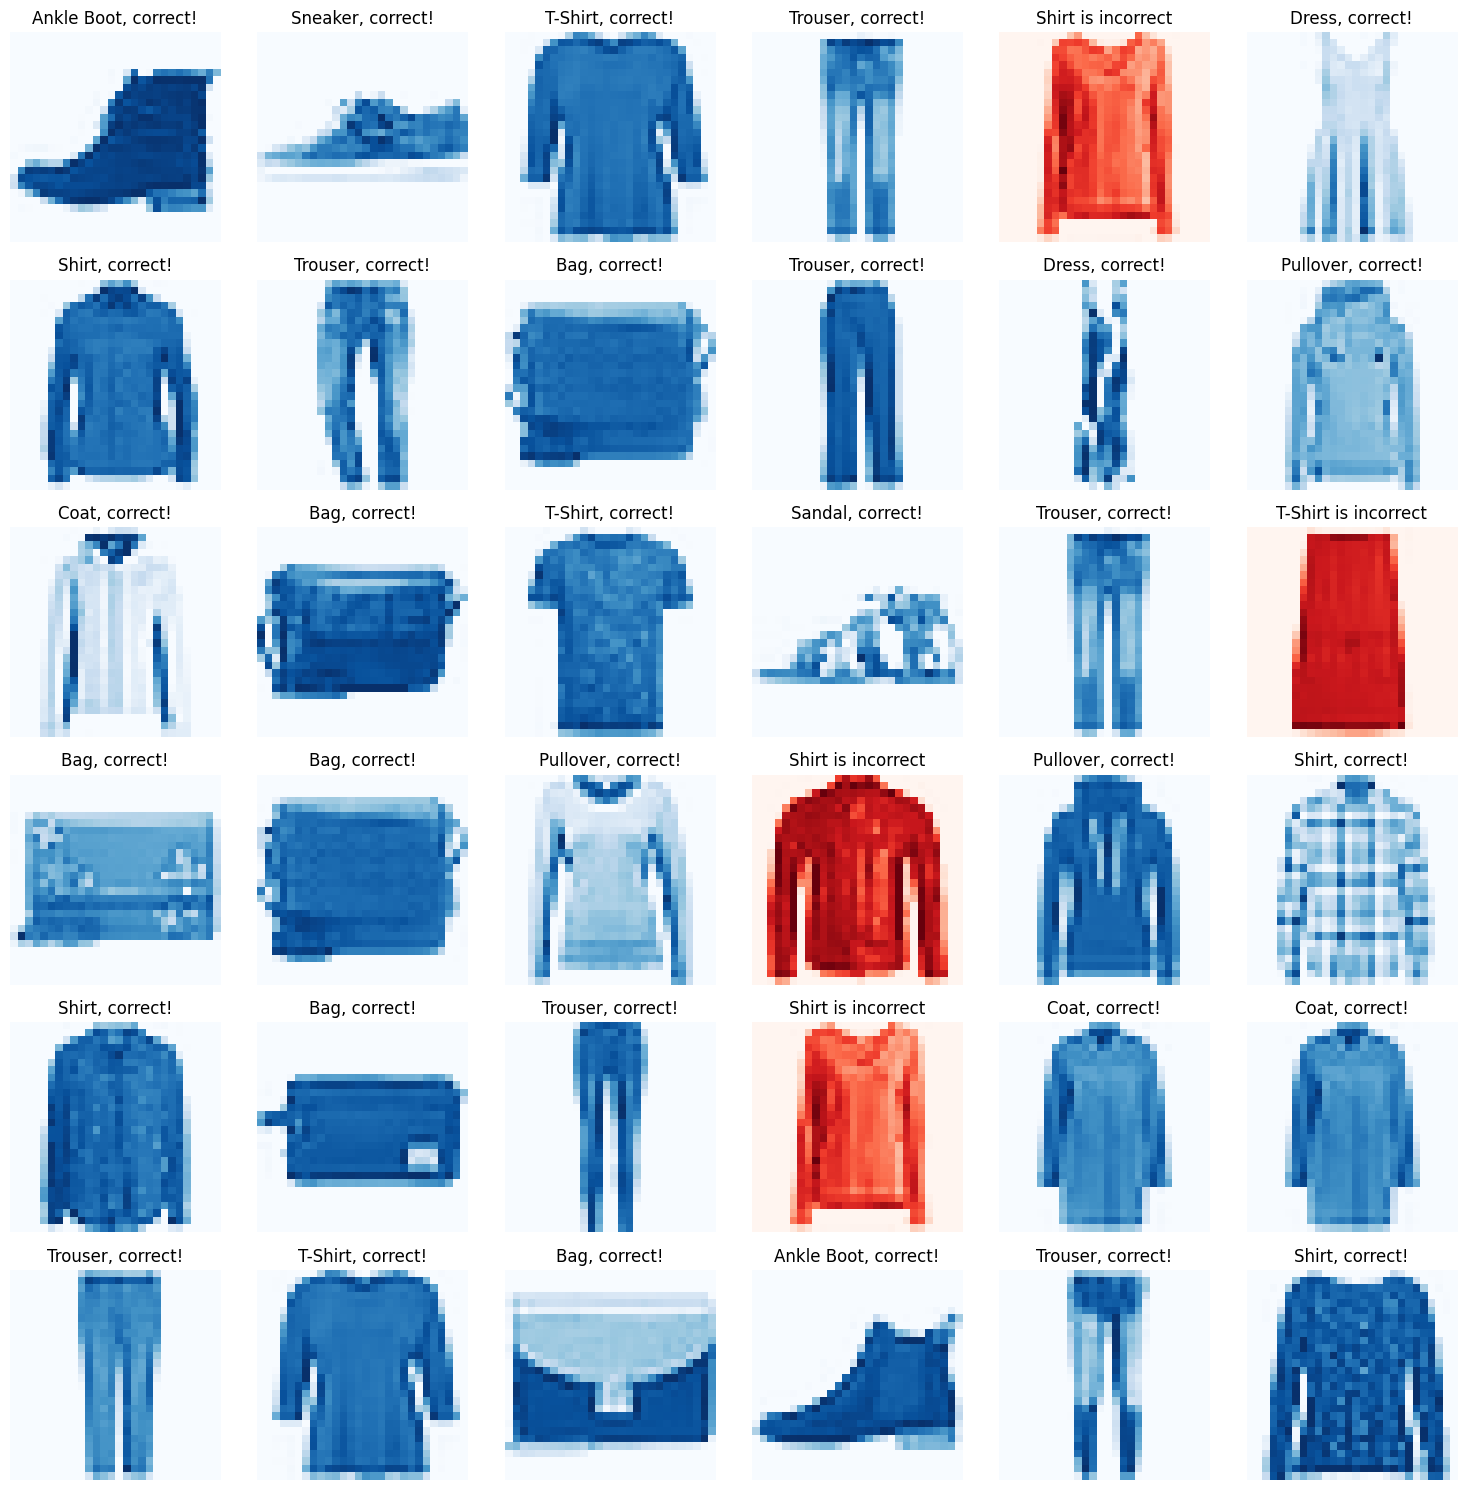

In [82]:
label_tags = { # 라벨 딕셔너리
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

columns = 6
rows = 6

fig = plt.figure(figsize=(15,15))
model.eval() # 모델을 평가모드로 변경

for i in range(1, columns * rows + 1):
    data_idx = np.random.randint(len(test_dataloader))
    input_img = test_data[data_idx][0].to(device)
    label = test_data[data_idx][1]

    with torch.no_grad():
        output = model(input_img)
        _, prediction = torch.max(output, 1)
        pred_class = label_tags[prediction.item()] #예측한 클래스는
        true_class = label_tags[label]

    title = f"{pred_class}, correct!" if pred_class == true_class else f"{pred_class} is incorrect"
    cmap = "Blues" if pred_class == true_class else "Reds"

    fig.add_subplot(rows, columns, i)
    plot_img = input_img.squeeze().cpu().numpy() # 먼저 차원 하나 줄여주기
    plt.imshow(plot_img, cmap=cmap)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

### 실습4 - CNN 구현

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. 데이터 입출력
# 데이터 전처리 (Normalization)
transform = transforms.Compose([transforms.RandomHorizontalFlip(), # 데이터 증강: 이미지 좌우 반전
                                transforms.RandomCrop(32, padding=4), # 패딩 적용한 후에 다시 랜덤으로 자름, 32 x 32 -> 40 x 40
                                transforms.ToTensor(), # 텐서로 변환
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # 정규화(RGB 평균), (RGB 표준편차)
                                

# CIFAR-10 데이터 로드
# 10개의 클래스로 구성된 32*32 60000개 컬러 이미지
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=2) # 배치 사이즈 100개씩 불러오기

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# 2. 모델 정의
class simpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # conv 2번 / pooling 2번. pooling - 특징을 추출하면 레이어 많아짐. 그만큼 데이터 크기 커짐. 그래서 이미지 사이즈 조정
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 6, 5), # 받아오는 이미지가 2차원이므로 2d 사용. 32x32 -> 32-5+1= 28x28x6
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # stride(28x28 -> 14x14)
            nn.Conv2d(6, 16, 5), # layer 6개였으니 input 6개, 커널도 똑같이 5개
            nn.MaxPool2d(2, 2)
        )
        self.flatten = nn.Flatten()
        self.fc_layer = nn.Sequential(
            nn.Linear(5*5*16, 120), # 120개로 줄임
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10) # 최종적으로 10개 [1, 2, 0.2, 0.3 .....]
        )

    def forward(self, x):
        out = self.conv_layers(x)
        flatten = self.flatten(out)
        fc_layer = self.fc_layer(flatten)
        return fc_layer
    
device = "cuda" if torch.cuda.is_available() else "cpu"
model = simpleCNN().to(device)

# 3. 손실함수 정의
loss_fn = nn.CrossEntropyLoss() # 다중함수이니까 크로스 엔트로피를

# 4. 가중치 학습
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
epochs = 10

# 5. 학습 반복
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("학습 완료")

# 테스트하기
correct = 0
total = len(test_loader.dataset)
with torch.no_grad(): # test는 기울기 계산 X
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 2.2944576597213744
Epoch 2, Loss: 2.162392142057419
Epoch 3, Loss: 1.9907967667579651
Epoch 4, Loss: 1.8806636390686036
Epoch 5, Loss: 1.7816559972763062
Epoch 6, Loss: 1.7207499594688416
Epoch 7, Loss: 1.6769486880302429
Epoch 8, Loss: 1.6376042175292969
Epoch 9, Loss: 1.6011068379878999
Epoch 10, Loss: 1.5678852310180664
학습 완료
Accuracy: 43.59%


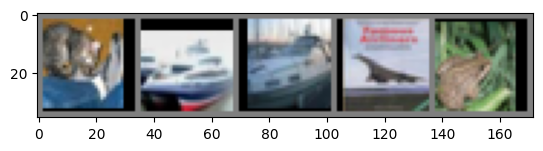

Predicted:  cat ship ship ship deer


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # unnormalize, 0~1범위의 이미지를 -1~1의 범위로 사용했기 때문에 -0.5 -> *2
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # 이미지 차원 변경 torch (채널, 높이, 너비) -> plt (높이, 너비, 채널)
    plt.show()

def visualize_predictions(model, test_loader, num_images=5):
    dataiter = iter(test_loader)
    images, labels = next(dataiter) # 첫번째 배치의 이미지만 가져오기

    # 이미지 출력
    imshow(torchvision.utils.make_grid(images[:num_images]))

    # 모델 예측
    images = images.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu().numpy()

    # 레이블 정의
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 예측 결과 출력
    print("Predicted: ", " ".join(classes[predicted[j]] for j in range(num_images)))

visualize_predictions(model, test_loader, num_images=5)